In [8]:
import pandas as pd
from Bio import SeqIO
import os

In [9]:
# latest paftol export containing ENA sample accessions
# https://www.ebi.ac.uk/ena/submit/report/swagger-ui.html#/samples/findAllUsingGET_13
pft_file = '../PAFTOL_DB/2022-01-31_paftol_export_stats.csv'
cptree_file = 'cpTree_v6/cpTree_v6_tree_clean.csv'
DataSource = 'SRA' 
org_dir = 'C:/Data/PAFTOL/Organelles/'

In [10]:
## All Validated Samples
R = pd.read_csv(cptree_file)
R = R[R.DataSource==DataSource]
subset = R.Sample_Name.to_list()
print(R.shape[0],subset[:2])

1612 ['SRR8655284', 'SRR8655280']


## Load data and subset

In [11]:
pdir = DataSource + '/'
sdir = 'ENA_submissions/' + pdir
if not os.path.exists(sdir):
    os.makedirs(sdir)

In [34]:
# Load GetOrg result table
Org_df = pd.read_csv(org_dir + DataSource + '/' + DataSource + '_Organelle_Recovery.csv').astype({'idSequencing':'int'})
if DataSource == 'PAFTOL':
    Org_df['Geseq_name'] = Org_df.Sample_Name.str.replace('PAFTOL_','Pis_')
elif DataSource in ['GAP']:
    Org_df['Geseq_name'] = Org_df.Sample_Name
elif DataSource in ['SRA']:
    sra2_pt = pd.read_csv('cpSRA_GetOrg/cpSRA_GetOrg_Organelle_Recovery.csv')
    Org_df = pd.concat([Org_df,sra2_pt],ignore_index=True)
    Org_df = Org_df.groupby('Sample_Name').head(1)
    Org_df['Geseq_name'] = Org_df.Sample_Name
print(Org_df.shape[0])
Org_df[:2]

2905


<ipython-input-34-1d75841ac48a>:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  Org_df = pd.concat([Org_df,sra2_pt],ignore_index=True)


,Assembly,Completed_Assembly,Completed_Extending,Completed_Output,Completed_Reads,Completed_Slimming,Coverage_Kmer,Coverage_base,Info_Disentangling_Failed,Info_Large_Repeats,...,log_nr,log_pt,maxK,nr_recovered,order,pt_recovered,sci_name,species,sum_len,Geseq_name
0,scaffold,True,True,True,True,True,153.2,492.1,True,False,...,True,True,105.0,True,Malvales,True,Abelmoschus esculentus,esculentus,260382.0,SRR5819803
1,scaffold,True,True,True,False,True,99.4,569.5,True,False,...,True,True,105.0,True,Caryophyllales,True,Abronia maritima,maritima,258912.0,SRR6435332


In [35]:
if subset is not None:
    Org_df = Org_df[Org_df.Sample_Name.isin(subset)]
    print(Org_df.shape[0],Org_df.Sample_Name.nunique())

1612 1612


In [36]:
# Load paftol export and merge ena sample IDs
db = pd.read_csv(pft_file)
db = db[db.idPaftol.notnull()].astype({'idPaftol':'int','idSequencing':'int'})
db = db[['Sample_Name','idPaftol', 'DataSource', 'Project', 'Order', 'Family', 'Genus', 'Species', 'Taxonomical_Notes', 
         'ENASampleNum', 'idSequencing', 'ExternalSequenceID', 'ENAExpNumber',
       'ENARunNumber', 'NumReads', 'NumRecoveredGenes', 'SumContigLength','NCBI_TaxID', 'NCBI_sciname']]
#        'title', 'taxId','id', 'alias', 'firstCreated', 'firstPublic', 'releaseStatus', 'secondaryId', 'scientificName', 'commonName']]
db[:2]

,Sample_Name,idPaftol,DataSource,Project,Order,Family,Genus,Species,Taxonomical_Notes,ENASampleNum,idSequencing,ExternalSequenceID,ENAExpNumber,ENARunNumber,NumReads,NumRecoveredGenes,SumContigLength,NCBI_TaxID,NCBI_sciname
0,PAFTOL_000564,1,PAFTOL,Asteraceae,Asterales,Asteraceae,Gymnolaena,sp.,Initially recorded as Gymnolaena litoralis but...,NaN,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PAFTOL_000961,2,PAFTOL,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,ERS5501508,961,NaN,ERX4839538,ERR5033191,625228.0,332.0,138795.0,39288.0,Circaeaster agrestis


In [37]:
Org_df = pd.merge(Org_df,
         db[['Sample_Name','DataSource','ENASampleNum','ENAExpNumber','ENARunNumber','NCBI_TaxID','NCBI_sciname']],
        how='left',on='Sample_Name').groupby('Sample_Name').head(1)
print(Org_df.isna().sum().to_dict())
print(Org_df.shape[0],Org_df.Sample_Name.nunique())

{'Assembly': 0, 'Completed_Assembly': 0, 'Completed_Extending': 0, 'Completed_Output': 0, 'Completed_Reads': 0, 'Completed_Slimming': 0, 'Coverage_Kmer': 135, 'Coverage_base': 1, 'Info_Disentangling_Failed': 0, 'Info_Large_Repeats': 0, 'NPath': 1601, 'NRepeat_Pattern': 1565, 'Nanybase_nr': 20, 'Nanybase_pt': 0, 'Nseq_nr': 20, 'Nseq_pt': 0, 'Redo_FastPlast': 0, 'Run_Time': 0, 'Sample_Name': 0, 'SumContigLength': 712, 'Sum_len_nr': 20, 'Sum_len_pt': 0, 'Warning_Look': 0, 'Warning_Multi_Structure': 0, 'Warning_Self_Loop': 0, 'error_nr': 1595, 'error_pt': 1611, 'family': 0, 'genus': 0, 'idSequencing': 609, 'log_nr': 0, 'log_pt': 0, 'maxK': 0, 'nr_recovered': 0, 'order': 0, 'pt_recovered': 0, 'sci_name': 0, 'species': 0, 'sum_len': 696, 'Geseq_name': 0, 'DataSource': 601, 'ENASampleNum': 1612, 'ENAExpNumber': 1612, 'ENARunNumber': 601, 'NCBI_TaxID': 627, 'NCBI_sciname': 627}
1612 1612


In [38]:
geseq_dir = sdir + 'fasta/'
if not os.path.exists(geseq_dir):
    os.makedirs(geseq_dir)

# Distribution of contigs

In [39]:
Org_df

,Assembly,Completed_Assembly,Completed_Extending,Completed_Output,Completed_Reads,Completed_Slimming,Coverage_Kmer,Coverage_base,Info_Disentangling_Failed,Info_Large_Repeats,...,sci_name,species,sum_len,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,scaffold,True,True,True,True,True,153.2,492.1,True,False,...,Abelmoschus esculentus,esculentus,260382.0,SRR5819803,SRA,NaN,NaN,SRR5819803,455045.0,Abelmoschus esculentus
1,scaffold,True,True,True,False,True,99.4,569.5,True,False,...,Abronia maritima,maritima,258912.0,SRR6435332,SRA,NaN,NaN,SRR6435332,2067806.0,Abronia maritima
2,circular genome,True,True,True,False,True,165.9,541.2,False,True,...,Abutilon theophrasti,theophrasti,175491.0,SRR12649607,SRA,NaN,NaN,SRR12649607,3631.0,Abutilon theophrasti
3,circular genome with gaps,True,True,True,True,True,76.5,454.7,True,False,...,Acanthochlamys bracteata,bracteata,7875.0,SRR11342831,SRA,NaN,NaN,SRR11342831,145231.0,Acanthochlamys bracteata
4,scaffold,True,True,True,True,True,94.6,546.5,True,False,...,Acantholimon lycopodioides,lycopodioides,236850.0,SRR6435297,SRA,NaN,NaN,SRR6435297,696526.0,Acantholimon lycopodioides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,scaffold,True,True,True,True,True,5.1,15.9,True,False,...,Muhlenbergia arenicola,arenicola,NaN,SRR12785851,NaN,NaN,NaN,NaN,NaN,NaN
1621,circular genome,True,True,True,True,True,83.2,271.1,False,True,...,Perityle incana,incana,NaN,SRR13010887,NaN,NaN,NaN,NaN,NaN,NaN
1622,scaffold,True,True,True,True,True,12.0,39.1,True,False,...,Pericome caudata,caudata,NaN,SRR13010877,NaN,NaN,NaN,NaN,NaN,NaN
1623,scaffold,True,True,True,False,True,35.4,210.4,True,False,...,Eutetras palmeri,palmeri,NaN,SRR13010910,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
Seq_ls = []
for idx, row in Org_df.iterrows():
    for record in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta', "fasta"):
        Seq_ls.append({'Sample_Name':row.Sample_Name,'SeqID':record.id,'SeqLen':len(record.seq)})

15178 1612
{0.1: 469.0, 0.5: 2199.0, 0.9: 20300.4} 0.7155751745948082


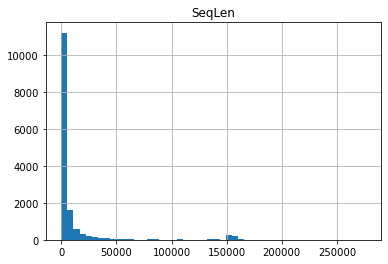

In [41]:
Seq_df = pd.DataFrame(Seq_ls)
print(Seq_df.shape[0], Seq_df.Sample_Name.nunique())
print(Seq_df.SeqLen.quantile([.1,.5,.9]).round(1).to_dict(),(Seq_df.SeqLen<5000).sum()/Seq_df.shape[0])
Seq_df.head(2)
Seq_df.hist(bins=50);

# Whole plastomes
### Annotation

In [42]:
whole_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps']) & (Org_df.Sum_len_pt>80000))]
print(whole_pt.shape[0],'samples',whole_pt.genus.nunique(),'genera')
whole_pt[:2]

331 samples 305 genera


,Assembly,Completed_Assembly,Completed_Extending,Completed_Output,Completed_Reads,Completed_Slimming,Coverage_Kmer,Coverage_base,Info_Disentangling_Failed,Info_Large_Repeats,...,sci_name,species,sum_len,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
2,circular genome,True,True,True,False,True,165.9,541.2,False,True,...,Abutilon theophrasti,theophrasti,175491.0,SRR12649607,SRA,NaN,NaN,SRR12649607,3631.0,Abutilon theophrasti
3,circular genome with gaps,True,True,True,True,True,76.5,454.7,True,False,...,Acanthochlamys bracteata,bracteata,7875.0,SRR11342831,SRA,NaN,NaN,SRR11342831,145231.0,Acanthochlamys bracteata


In [43]:
geseq_dir

'ENA_submissions/SRA/fasta/'

In [44]:
# Output fasta files 
for idx, row in whole_pt.iterrows():
    seqs = list(SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'))
    # Verif only 1 sequence
    if len(seqs) > 1:
        print('error, more than 1 sequence')
        pass
    seq = seqs[0]
    print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,len(seq),seq.seq.count('N'))
    seq.id = row.Geseq_name
    seq.description = ''
    SeqIO.write(seq, geseq_dir + row.Geseq_name + '-circular.fasta',format='fasta')

SRR12649607 SRR12649607 Malvaceae Abutilon theophrasti 160446 0
SRR11342831 SRR11342831 Velloziaceae Acanthochlamys bracteata 153642 10
ERR4210270 ERR4210270 Brassicaceae Pseudocamelina glaucophylla 153384 77
SRR3478564 SRR3478564 Dioscoreaceae Tacca chantrieri 163007 0
SRR6425650 SRR6425650 Apocynaceae Alafia barteri 155272 0
ERR2789774 ERR2789774 Brassicaceae Ballantinia pumilio 154346 0
SRR1145773 SRR1145773 Rosaceae Bencomia exstipulata 153731 0
SRR10679069 SRR10679069 Lamiaceae Caryopteris trichosphaera 151382 0
SRR6425648 SRR6425648 Apocynaceae Cascabela thevetia 155029 0
SRR13385162 SRR13385162 Poaceae Chimonobambusa sichuanensis 139602 0
SRR2155068 SRR2155068 Asteraceae Conoclinium coelestinum 151335 0
ERR4210279 ERR4210279 Brassicaceae Delpinophytum patagonicum 154932 0
SRR9309785 SRR9309785 Phrymaceae Diplacus longiflorus 153798 0
SRR8666566 SRR8666566 Fabaceae Gastrolobium grandiflorum 152366 10
SRR13089735 SRR13089735 Gentianaceae Gentianopsis paludosa 151569 0
SRR12649932 

Submit files to GeSeq https://chlorobox.mpimp-golm.mpg.de/geseq.html and extract zip file in wdir/GeSeq_output

In [45]:
whole_pt.to_csv(sdir + DataSource + '_wholePT.csv',index=False)

# Contigs

In [46]:
contigs_pt = Org_df[(Org_df.Assembly.isin(['circular genome','circular genome with gaps'])==False) &
                   (Org_df.pt_recovered==True)]
print(contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt[:2]

1275 samples 1071 genera


,Assembly,Completed_Assembly,Completed_Extending,Completed_Output,Completed_Reads,Completed_Slimming,Coverage_Kmer,Coverage_base,Info_Disentangling_Failed,Info_Large_Repeats,...,sci_name,species,sum_len,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,scaffold,True,True,True,True,True,153.2,492.1,True,False,...,Abelmoschus esculentus,esculentus,260382.0,SRR5819803,SRA,NaN,NaN,SRR5819803,455045.0,Abelmoschus esculentus
1,scaffold,True,True,True,False,True,99.4,569.5,True,False,...,Abronia maritima,maritima,258912.0,SRR6435332,SRA,NaN,NaN,SRR6435332,2067806.0,Abronia maritima


In [47]:
# Output fasta files
min_len = 50000
contigs_pt['Np_contigs'] = 0; contigs_pt['Sump_contigs'] = 0;
for idx, row in contigs_pt.iterrows():
    contigx = 1
    for seq in SeqIO.parse(org_dir + DataSource + '/' + 'fasta_pt/' + row.Sample_Name + '_pt.fasta',format='fasta'):
        # if longer than
        if len(seq) > min_len:
            if '--' in seq.id:
                seq.description = '' # seq.id.split('--')[0] + ' contig_info:' + seq.id.split('--')[1] + ', length:' + str(len(seq.seq))
                seq.id = row.Geseq_name + '-' + str(contigx)
            elif 'circular' in seq.id:
                seq.description = 'circular' + ' contig_info:' + seq.id.split('-')[0] + ', length:' + str(len(seq.seq))
                seq.id = row.Geseq_name + '-' + 'circular'
            SeqIO.write(seq, geseq_dir + seq.id + '.fasta',format='fasta')
            contigs_pt.loc[idx,'Np_contigs'] += 1; contigs_pt.loc[idx,'Sump_contigs'] += len(seq)
            contigx += 1
    if contigs_pt.loc[idx,'Np_contigs']>0:
        print(row.Sample_Name, row.Geseq_name, row.family, row.sci_name,row.Sum_len_pt,
              contigs_pt.loc[idx,'Np_contigs'],contigs_pt.loc[idx,'Sump_contigs'])

<ipython-input-47-4b19a1b6d482>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contigs_pt['Np_contigs'] = 0; contigs_pt['Sump_contigs'] = 0;
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


SRR10120864 SRR10120864 Bromeliaceae Alcantarea nigripetala 156717.0 1 156717
ERR4210389 ERR4210389 Brassicaceae Anelsonia eurycarpa 155195.0 1 155195
ERR4221516 ERR4221516 Brassicaceae Aphragmus nepalensis 149346.0 1 149346
ERR4210224 ERR4210224 Brassicaceae Arabidella trisecta 154821.0 1 117009
ERR4210276 ERR4210276 Brassicaceae Asperuginoides axillaris 153199.0 1 153199
ERR4205136 ERR4205136 Brassicaceae Asta schaffneri 154323.0 1 154323
SRR13155208 SRR13155208 Orobanchaceae Bartsia alpina 153370.0 1 153370
ERR4209706 ERR4209706 Brassicaceae Brayopsis alpaminae 127693.0 1 54916
ERR4208931 ERR4208931 Brassicaceae Clausia aprica 156807.0 1 65634
ERR4210293 ERR4210293 Capparaceae Crateva tapia 156959.0 1 156959
ERR4210231 ERR4210231 Brassicaceae Dimorphocarpa wislizeni 153226.0 1 153226
ERR4210280 ERR4210280 Brassicaceae Dipoma iberideum 127594.0 1 57937
SRR6425637 SRR6425637 Apocynaceae Dischidia albida 175797.0 1 175426
SRR8666659 SRR8666659 Poaceae Enteropogon ramosus 132609.0 1 132

In [48]:
contigs_pt = contigs_pt[contigs_pt.Np_contigs>0]
print(contigs_pt.Np_contigs.sum(), contigs_pt.shape[0],'samples',contigs_pt.genus.nunique(),'genera')
contigs_pt.to_csv(sdir + DataSource + '_contigsPT.csv',index=False)

488 456 samples 392 genera


### ENA submission
https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#

cd C:\Data\PAFTOL\cpDNA\ENA_submissions

In [10]:
paper_title = 'Leveraging nuclear phylogenomic research to build the largest ever plastome dataset'
paper_authors = 'KEVIN LEEMPOEL1, PAUL BAILEY1, ELAINE FRANCOSO1, BERTA GALLEGO1, De-Zhu Li2,3,4, Hong-Tao Li2,3, OLIVIER MAURIN1, SHYAMALI ROY1,' +  \
            'Jun-Bo Yang2,3, Ting-Shuang Yi2,3, ALEXANDRE R. ZUNTINI1, WOLF L. EISERHARDT1,5,' +  \
            'PAUL J. KERSEY1, ILIA J. LEITCH1, FELIX FOREST1 AND WILLIAM J. BAKER1'
paper_journal = 'Unpublished'
paper_id = 'NA'

In [11]:
whole_pt = pd.read_csv(sdir + DataSource + '_wholePT.csv')
print(whole_pt.shape[0])
whole_pt = whole_pt[(whole_pt.ENASampleNum.notnull()) & (whole_pt.ENARunNumber.notnull())]
print(whole_pt.shape[0])
whole_pt = whole_pt[whole_pt.NCBI_sciname.notnull()]
print(whole_pt.shape[0])
whole_pt.head(2)

338
206
199


,idPaftol,idSequencing,Sample_Name,Project,order,family,genus,species,Taxonomical_Notes,SumContigLength,...,Redo_FastPlast,error_pt,error_nr,Geseq_name,DataSource,ENASampleNum,ENAExpNumber,ENARunNumber,NCBI_TaxID,NCBI_sciname
0,2,961,PAFTOL_000961,Pilot,Ranunculales,Circaeasteraceae,Circaeaster,agrestis,NaN,138795.0,...,False,NaN,NaN,Pis_000961,PAFTOL,ERS5501508,ERX4839538,ERR5033191,39288.0,Circaeaster agrestis
2,35,973,PAFTOL_000973,Pilot,Piperales,Aristolochiaceae,Lactoris,fernandeziana,NaN,187023.0,...,False,NaN,NaN,Pis_000973,PAFTOL,ERS4591019,ERX4143470,ERR4180046,22303.0,Lactoris fernandeziana


In [14]:
# Rename and modify genbank files, convert to embl flat file
if not os.path.exists(sdir + '/Genbank_files/'):
    os.makedirs(sdir + '/Genbank_files/')
gb_files = [file for file in os.listdir(sdir + 'geseq/') if file.endswith('.gb')]
print(len(gb_files))
for idx, row in whole_pt.iterrows():
    idx_file = [i for i, x in enumerate([row.Geseq_name in file for file in gb_files]) if x]
    for index, record in enumerate(SeqIO.parse(sdir + 'geseq/' + gb_files[idx_file[0]], "genbank")):
        try:
            print(record.id)
            record.id = row.ENARunNumber + '_pt'
            record.name = row.ENARunNumber
            record.description = row.ENASampleNum + ' (' + row.Sample_Name + ') chloroplast, complete genome'
            record.version = row.ENASampleNum + '.1'
            record.annotations['source'] = row.ENASampleNum + ', ' + row.sci_name + ', isolate'
            record.annotations['accessions'] = row.ENASampleNum
            record.annotations['organism'] = row.NCBI_sciname
            record.annotations["data_file_division"]="PLN";
            record.annotations.pop('taxonomy')
            record.annotations['references'][0].title = paper_title    
            record.annotations['references'][0].authors = paper_authors    
            record.annotations['references'][0].journal = paper_journal      
            record.annotations['references'][0].pubmed_id = paper_id    
            record.features[0].qualifiers['organism'] = row.NCBI_sciname
            record.features[0].qualifiers['db_xref'] = ['taxon:' + str(int(row['NCBI_TaxID']))]
            SeqIO.write(record,sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb',format='genbank')
        except:
            print('issue with ',gb_files[idx_file[0]])

339
Pis_000961
Pis_000973
Pis_000920
Pis_001000


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '146883..85092' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_002827
Pis_003547
Pis_000754
Pis_000761
Pis_003103
Pis_002566
Pis_002635
Pis_003094
Pis_000850
Pis_000818
Pis_000849
Pis_001332


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '147590..87526' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_002736
Pis_002956
Pis_001343
Pis_002552
Pis_002553
Pis_001425
Pis_003293
Pis_002609
Pis_001346


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '156397..94034' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_003163
Pis_001110
Pis_001108
Pis_001192
Pis_000259
Pis_000253
Pis_000252
Pis_002940
Pis_003893


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '116923..47678' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '85224..40142' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '114168..62183' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_003920
Pis_003922
Pis_003936
Pis_004064
Pis_004330
Pis_004332
Pis_004362
Pis_004366
Pis_004368
Pis_004375
Pis_004382
Pis_004431
Pis_004434
Pis_004462
Pis_004693
Pis_004699
Pis_004938
Pis_005069


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '155019..93438' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '146052..85772' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_005072
Pis_005073


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '149477..88769' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '149983..89095' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_005077
Pis_005084
Pis_005097
Pis_005100
Pis_005232
Pis_005264
Pis_005279
Pis_005395
Pis_005397
Pis_005398
Pis_005408
Pis_005426
Pis_005447
Pis_005473
Pis_005519
Pis_005538
Pis_005574
Pis_005632
Pis_005636
Pis_005642
Pis_005772
Pis_005778
Pis_005798
Pis_005823
Pis_005825
Pis_005888
Pis_006246
Pis_006336
Pis_006525
Pis_006561
Pis_006627
Pis_006634


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '148513..85945' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_006839
Pis_006866


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '147996..86046' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_006867
Pis_006897


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '148112..85621' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_006903
Pis_006904


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '147721..85465' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '92562..29375' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_006914
Pis_007029


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '92703..29294' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_007046
Pis_007094
Pis_007099
Pis_007100
Pis_007101
Pis_007116
Pis_007122
Pis_007127
Pis_007132
Pis_007243
Pis_007252
Pis_007328
Pis_007557
Pis_007555
Pis_011276
Pis_008694
Pis_008695
Pis_008696
Pis_008700
Pis_008701
Pis_008707
Pis_009181
Pis_009183
Pis_009185
Pis_009187
Pis_009189
Pis_009197


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '75494..1963' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_009203
Pis_009207
Pis_009217
Pis_009219
Pis_009237
Pis_009247
Pis_009249
Pis_009251
Pis_009253
Pis_009265
Pis_009281
Pis_009289
Pis_009311
Pis_009433
Pis_009435
Pis_009495
Pis_009541
Pis_009551
Pis_009557
Pis_013047
Pis_009703
Pis_013049
Pis_009717
Pis_009977


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '106058..2092' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_010007
Pis_010013
Pis_010041
Pis_010189
Pis_010247
Pis_010255
Pis_010291
Pis_010433
Pis_010435
Pis_010479
Pis_010507
Pis_010517
Pis_010519
Pis_010527
Pis_010535
Pis_010541
Pis_010629
Pis_010649
Pis_010669
Pis_010691
Pis_010697
Pis_010707
Pis_010729
Pis_010731
Pis_010787
Pis_010841
Pis_010853
Pis_010953
Pis_010961
Pis_010965
Pis_011137
Pis_011791
Pis_011933
Pis_011935
Pis_011949


C:\ProgramData\Anaconda3\lib\site-packages\Bio\GenBank\__init__.py:366: BiopythonParserWarning: Attempting to fix invalid location '156289..89570' as it looks like incorrect origin wrapping. Please fix input file, this could have unintended behavior.
  BiopythonParserWarning,


Pis_012019
Pis_012021
Pis_012025
Pis_012029
Pis_012053
Pis_012061
Pis_012163
Pis_012169
Pis_012175
Pis_012185
Pis_012209
Pis_012225
Pis_012227
Pis_012355
Pis_013501
Pis_019285
Pis_019301
Pis_019327
Pis_019361


In [99]:
# def del_features(records, feat_del_ls = ['translation','info','annotator']):
#     for rec in SeqIO.parse(embl_file, format ="embl"):
#             if rec.features:
#                 for idx, feature in enumerate(rec.features):
#                         for feat_to_del in feat_del_ls:
#                             if feat_to_del in feature.qualifiers:
# #                             print(idx, feature)
#                                 del rec.features[idx].qualifiers[feat_to_del]
#     return rec
def del_features(records, feat_del_ls = ['translation','info','annotator']):
    for feature in records.features:
        for feat_to_del in feat_del_ls:
            if feat_to_del in feature.qualifiers:
                del feature.qualifiers[feat_to_del]
    return records
def del_fragment(records, ls_types = ['gene','CDS','rRNA']):
    # list gene names
    ls_feat = []
    for feature in records.features:
        if feature.type in ls_types:
            ls_feat.append(feature.qualifiers['gene'][0])
    # remove fragments from list
    print(len(ls_feat),end='>')
    ls_feat = [ifeat for ifeat in ls_feat if 'fragment' not in ifeat]
    print(len(ls_feat))
    
    # remove fragment feature if full feature is present
    for feature in records.features:
#         print(feature.type, feature.qualifiers)
        if feature.type in ls_types:
            if 'fragment' in feature.qualifiers['gene'][0]:
                print(feature.type, feature.qualifiers,end=':')
                if feature.qualifiers['gene'][0].split('-')[0] in ls_feat:
                    print('true')
                    records.features.remove(feature)
                else:
                    print('false')
    return records
# for index, record in enumerate(SeqIO.parse(sdir + row.Sample_Name + '_pt.embl', "embl")):
#     print(record)
def gzip_file(in_file):
    import gzip
    import shutil
    f_gz = in_file + '.gz'
    with open(in_file, 'rb') as f_in:
        with gzip.open(f_gz, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [100]:
for feature in records.features:
    if feature.type in ls_types:
        if 'rrn23' in feature.qualifiers['gene'][0]:
            print(feature.type, feature.qualifiers, feature.qualifiers['gene'][0].split('-')[0], 
                 'fragment' in feature.qualifiers['gene'][0])

gene OrderedDict([('gene', ['rrn23'])]) rrn23 False
rRNA OrderedDict([('gene', ['rrn23']), ('product', ['23S ribosomal RNA'])]) rrn23 False
gene OrderedDict([('gene', ['rrn23'])]) rrn23 False
rRNA OrderedDict([('gene', ['rrn23']), ('product', ['23S ribosomal RNA'])]) rrn23 False
gene OrderedDict([('gene', ['rrn23'])]) rrn23 False
rRNA OrderedDict([('gene', ['rrn23']), ('product', ['23S ribosomal RNA'])]) rrn23 False
gene OrderedDict([('gene', ['rrn23'])]) rrn23 False
rRNA OrderedDict([('gene', ['rrn23']), ('product', ['23S ribosomal RNA'])]) rrn23 False


In [95]:
for feature in records.features:
    if feature.type in ls_types:
        if 'fragment' in feature.qualifiers['gene'][0]:
            print(feature.type, feature.qualifiers, feature.qualifiers['gene'][0].split('-')[0])

In [ ]:
if not os.path.exists(sdir + '/EMBL_files/'):
    os.makedirs(sdir + '/EMBL_files/')
for idx, row in whole_pt.iterrows():
    ### Convert .gb to EMBL flat files
    file_gb = sdir + '/Genbank_files/' + row.Sample_Name + '_pt.gb'
    records = list(SeqIO.parse(file_gb, "genbank"))[0]
#     records = SeqIO.parse(file_gb, "genbank")
    file_embl = sdir + '/EMBL_files/' + row.Sample_Name + '.embl'
#     SeqIO.write(records, file_embl, "embl")
    records_clean = del_features(records)
    records_clean = del_fragment(records_clean)
    records_clean = del_fragment(records_clean)
    SeqIO.write(records_clean, file_embl, "embl")
    gzip_file(file_embl)
    ### Chromosome list file
    # https://ena-docs.readthedocs.io/en/latest/submit/fileprep/assembly.html?highlight=chloroplast#chromosome-list-file
    list_file=row.ENARunNumber + '_pt	PT	Circular-Chromosome	Chloroplast'
    with open(file_embl.replace('.embl','_CHR.txt'), 'wb') as f:
        f.write(list_file.encode("ascii"))
    gzip_file(file_embl.replace('.embl','_CHR.txt'))
    ### Manifest file 
    # https://ena-docs.readthedocs.io/en/latest/submit/assembly/genome.html 
    manifest_file = file_embl.replace('.embl','_manifest.txt')
    manifest={
    'STUDY':'PRJEB35285', #https://www.ncbi.nlm.nih.gov/bioproject/588607
    'SAMPLE':row.ENASampleNum,
    'ASSEMBLYNAME':row.ENARunNumber + '_pt',
    'ASSEMBLY_TYPE':'clone or isolate',
    'COVERAGE':row.Coverage_base,
    'PROGRAM':'GetOrganelle v1.7.5 +  GeSeq 2.03',
    'PLATFORM':'ILLUMINA',
    'MOLECULETYPE':'genomic DNA',
    'FLATFILE': row.Sample_Name + '.embl.gz',
    'CHROMOSOME_LIST': row.Sample_Name + '_CHR.txt.gz',
    'DESCRIPTION': row.NCBI_sciname + ' chloroplast, complete genome'
    }
    manifest = pd.DataFrame.from_dict(manifest,orient='index')
    manifest.to_csv(manifest_file,header=None,sep='\t')
    
    # Submission command
    print('java -jar C:/Data/PAFTOL/Organelles/ENA_submissions/webin-cli-4.3.0.jar ' + 
          '-username Webin-52995 -passwordFile C:/Data/PAFTOL/Organelles/ENA_submissions/ena_pwd.txt -context genome -manifest ' +
          row.Sample_Name + '_manifest.txt' + ' -validate') 